<a href="https://colab.research.google.com/github/rubyvanrooyen/ARIWS-Cookbook/blob/main/2-Flagging_and_calibration/Verify_calibration_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIWS notebook with sample MeerKAT data using CASA

See the [CASA installation](https://casa.nrao.edu/casadocs/casa-5.6.0/introduction/casa6-installation-and-usage) page for information on the CASA with Jupiter notebooks and Colab
Example code for this notebook can be found on [CASA6_demo.ipynb](https://go.nrao.edu/casa6)

Refer to the [MeerKAT Cookbook](https://github.com/ska-sa/MeerKAT-Cookbook) for information related to archive data access and tokens, as well as the MeerKAT `katdal` software package.


## CASA workspace installation

In [ ]:
print("installing pre-requisite packages...")
!apt-get install -y libgfortran3

Google colab upgraded default python for runtime environment to 3.7 in Feb 2021.
At 7 May 2021, no wheel exists for casatools and casatasks installation, using CASA suggested install of pre-release version for 3.7 and 3.8.

Check current python version

In [2]:
!python --version

Python 3.7.10


See if a wheel exist for casatools installation

https://casa.nrao.edu/casa_obtaining.shtml and     
https://casa.nrao.edu/casadocs/latest/usingcasa/obtaining-and-installing

If a wheel exists for this version of python, add the code block as per example (for 3.6)   
```
!pip install --index-url https://casa-pip.nrao.edu/repository/pypi-casa-release/simple casaplotms==1.0.24
```

No wheel currently available for 3.7, notes on work around for >=3.7    
https://www.magclouds.org/casa6-docker/html/install/usage.html    
(https://pypi.org/project/casa6-install/)

In [3]:
!git clone https://github.com/r-xue/casa6-docker.git

Cloning into 'casa6-docker'...
remote: Enumerating objects: 316, done.
remote: Counting objects: 100% (316/316), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 316 (delta 136), reused 299 (delta 123), pack-reused 0
Receiving objects: 100% (316/316), 10.21 MiB | 19.14 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [4]:
!ln -s /content/casa6-docker/casa6_install/casa6_install.py casa6_install.py

In [ ]:
!python casa6_install.py

In [6]:
import os

print("building config files...")
!mkdir -p ~/.casa
!echo home, datapath = \'/content/\', [\'/content/\'] > ~/.casa/toolrc.py
!cat ~/.casa/toolrc.py

print('complete')

# check installation
import casatasks
from casatasks import listobs

building config files...
home, datapath = '/content/', ['/content/']
complete
Creating a new telemetry file


Telemetry initialized. Telemetry will send anonymized usage statistics to NRAO.
You can disable telemetry by adding the following line to the config.py file in your rcdir (e.g. ~/.casa/config.py):
telemetry_enabled = False


In [ ]:
!apt-get install -y xvfb x11-utils
!pip install pyvirtualdisplay

print(os.getenv('DISPLAY'))

import pyvirtualdisplay

_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()

print(os.getenv('DISPLAY'))

# Mounting Google drive locally
Mount your Google Drive on your runtime using an authorization code

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Create symbolic link in the `/content` top layer folder for each processing.    
Use the appropriate path to the example dataset you copied to your drive

In [9]:
example_data = "/content/drive/MyDrive/ARIWS\ public\ datasets/output/ngc3621_calibrated.ms.tar.gz"

In [10]:
!ln -s {example_data}

## Data from MeerKAT archive

Unpack MeerKAT example data file

In [11]:
datafile = "ngc3621_calibrated.ms.tar.gz"

In [ ]:
!tar -xvzf {datafile}

In [13]:
msfile = "ngc3621_fixvis.ms"
listobs(vis=msfile)
print(os.popen("cat casa-*.log").read())

2021-05-08 19:04:21	INFO	::casa	
2021-05-08 19:04:24	INFO	::casa	CASA Version 6.1.2.7
2021-05-08 19:04:24	INFO	::casa	
2021-05-08 19:04:24	INFO	::casa	Telemetry log file: /root/.casa/casastats-6.1.2.7-242ac1c02-20210508-190424.log
2021-05-08 19:04:24	INFO	::casa	Checking telemetry submission interval
2021-05-08 19:04:24	INFO	::casa	Creating a new telemetry time stamp file./root/.casa/telemetry-242ac1c02.stamp
2021-05-08 19:04:24	INFO	::casa	Telemetry submit interval not reached. Not submitting data.
2021-05-08 19:04:24	INFO	::casa	Next telemetry data submission in: 6 days, 23:59:59.999439
2021-05-08 19:09:25	INFO	listobs::::casa	##########################################
2021-05-08 19:09:25	INFO	listobs::::casa	##### Begin Task: listobs            #####
2021-05-08 19:09:25	INFO	listobs::::casa	listobs( vis='ngc3621_fixvis.ms', selectdata=True, spw='', field='', antenna='', uvrange='', timerange='', correlation='', scan='', intent='', feed='', array='', observation='', verbose=True, lis

# Inspecting calibrated data

In [33]:
from IPython.display import Image
import casaplotms
from casaplotms import plotms
from casatasks import applycal, split, visstat

In [14]:
msfile = 'ngc3621_fixvis.ms'
prefix = 'ngc3621_fixvis'

target='NGC3621'
g_cal='1117-248'
b_cal='0408-65'
f_cal='0408-65'

ktable = prefix + '.K'
btable = prefix + '.B'
gtable = prefix + '.G'
ftable = prefix + '.flux'

### Verify efficiency of calibration and flagging

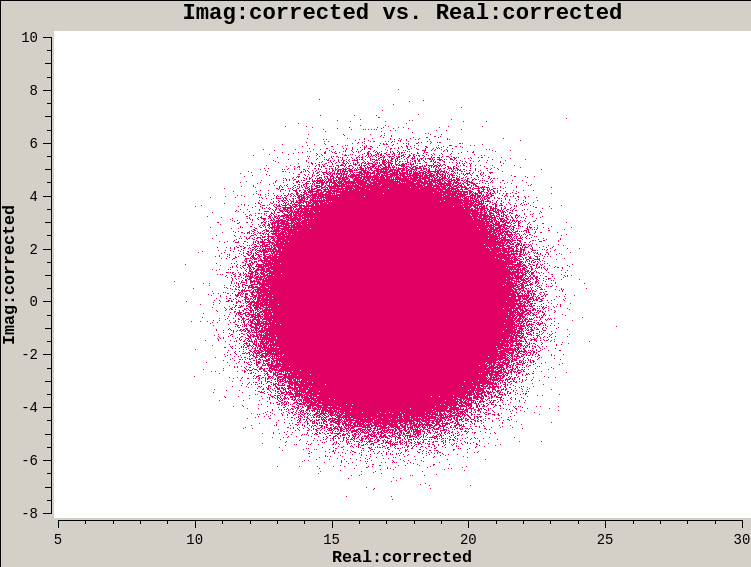

In [17]:
plotms(vis=msfile,
       xaxis='real',
       yaxis='imag',
       correlation='XX,YY',
       xdatacolumn='corrected',
       ydatacolumn='corrected',
       field=f_cal,
       avgscan=False,
       coloraxis='scan',
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       clearplots=True,
       )
Image('mkat_passband.png', height=500)

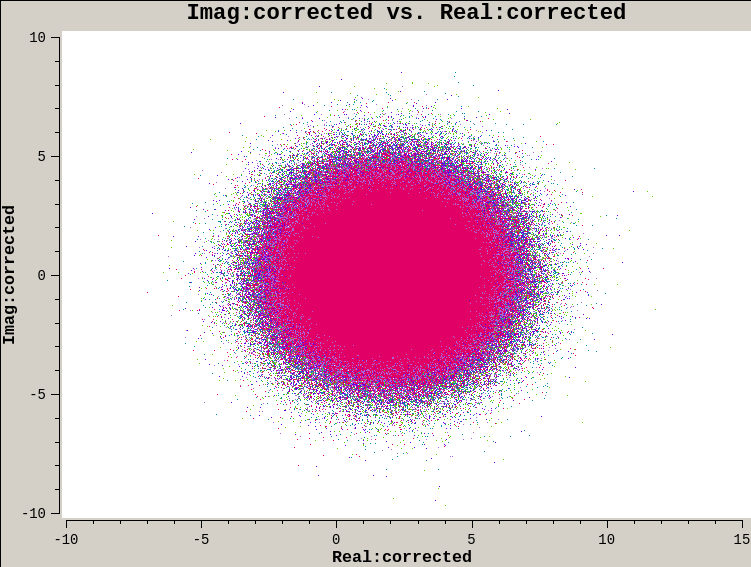

In [18]:
plotms(vis=msfile,
       xaxis='real',
       yaxis='imag',
       correlation='XX,YY',
       xdatacolumn='corrected',
       ydatacolumn='corrected',
       field=g_cal,
       avgscan=False,
       coloraxis='scan',
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       clearplots=True,
       )
Image('mkat_passband.png', height=500)

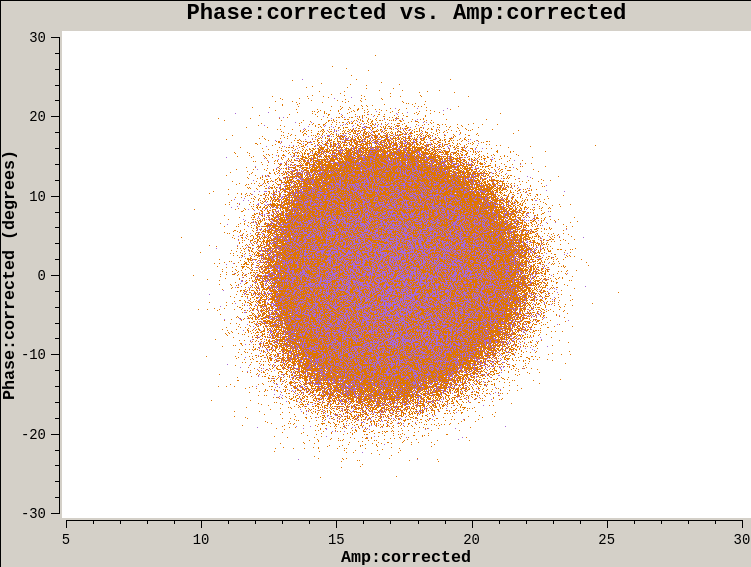

In [19]:
plotms(vis=msfile,
       xaxis='amp',
       yaxis='phase',
       correlation='XX,YY',
       xdatacolumn='corrected',
       ydatacolumn='corrected',
       field=f_cal,
       avgscan=False,
       coloraxis='corr',
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       clearplots=True,
       )
Image('mkat_passband.png', height=500)

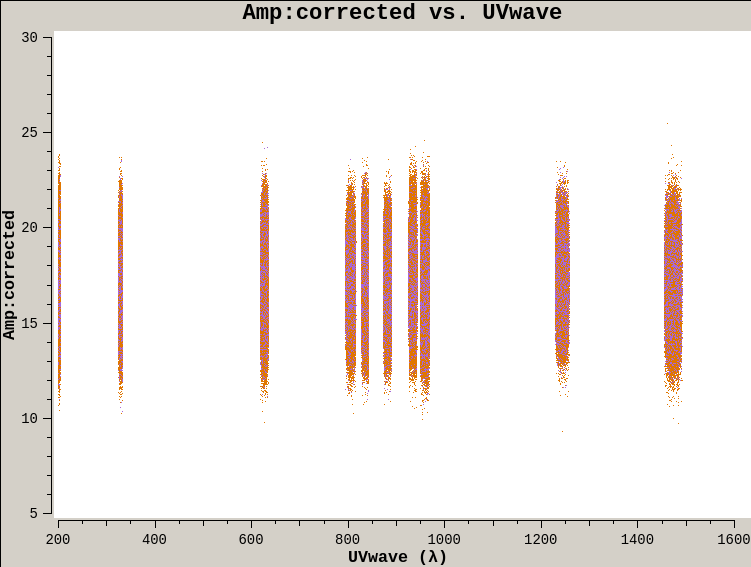

In [20]:
plotms(vis=msfile,
       xaxis='uvwave',
       yaxis='amp',
       correlation='XX,YY',
       xdatacolumn='corrected',
       ydatacolumn='corrected',
       field=f_cal,
       avgscan=False,
       coloraxis='corr',
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       clearplots=True,
       )
Image('mkat_passband.png', height=500)

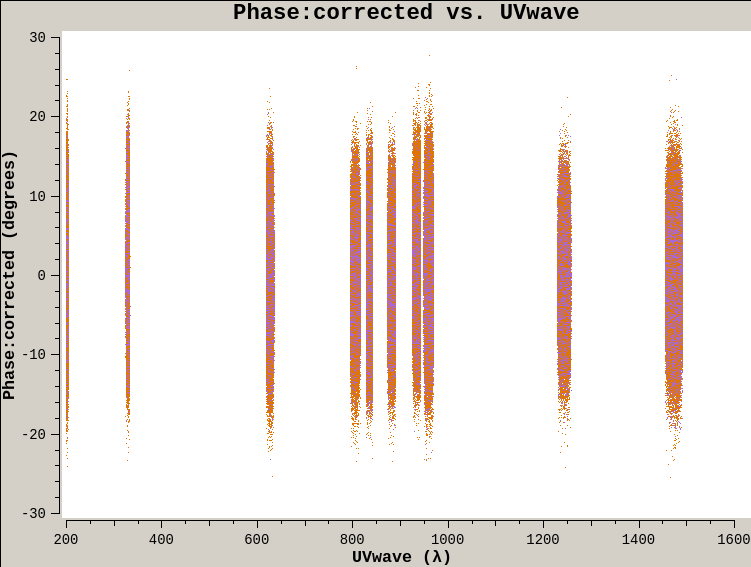

In [21]:
plotms(vis=msfile,
       xaxis='uvwave',
       yaxis='phase',
       correlation='XX,YY',
       xdatacolumn='corrected',
       ydatacolumn='corrected',
       field=f_cal,
       avgscan=False,
       coloraxis='corr',
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       clearplots=True,
       )
Image('mkat_passband.png', height=500)

### Inspect data for flagging after antenna based calibration

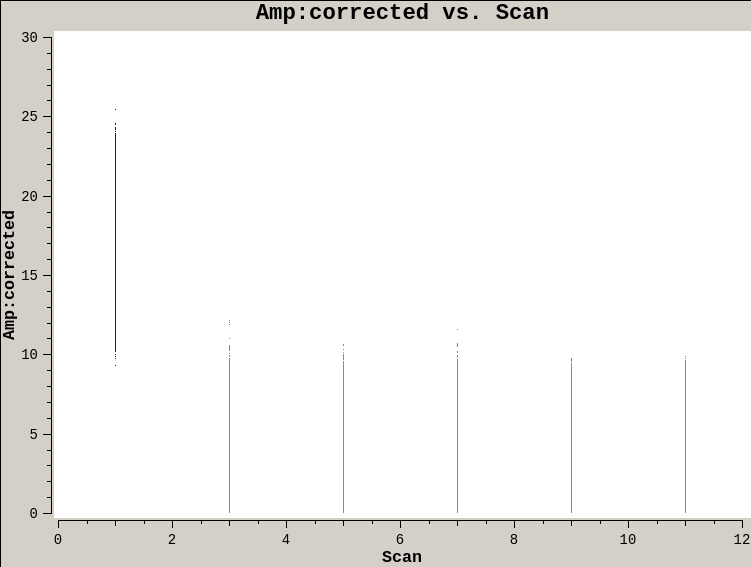

In [22]:
plotms(vis=msfile,
       xaxis='scan',
       yaxis='amp',
       correlation='XX,YY',
       xdatacolumn='corrected',
       ydatacolumn='corrected',
       field=f_cal+','+g_cal,
       avgscan=False,
       coloraxis='field',
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       clearplots=True,
       )
Image('mkat_passband.png', height=500)

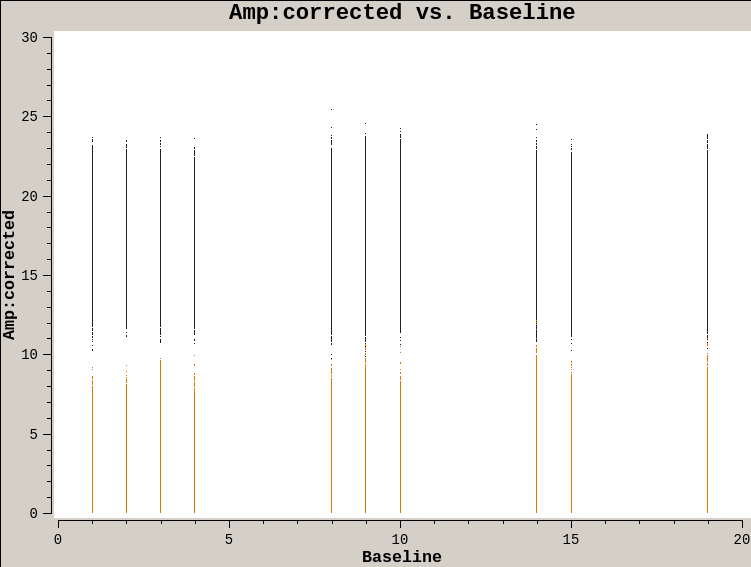

In [23]:
plotms(vis=msfile,
       xaxis='baseline',
       yaxis='amp',
       correlation='XX,YY',
       xdatacolumn='corrected',
       ydatacolumn='corrected',
       field=f_cal+','+g_cal,
       avgscan=False,
       coloraxis='field',
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       clearplots=True,
       )
Image('mkat_passband.png', height=500)

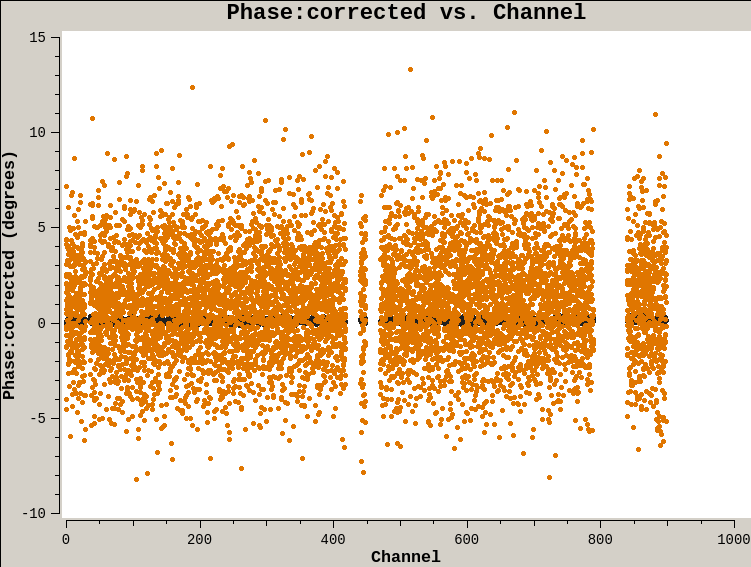

In [24]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='phase',
       averagedata=True,
       avgtime='3300',
       ydatacolumn='corrected',
       avgbaseline=True,
       correlation='XX,YY',
       field=','.join((f_cal,g_cal)),
       coloraxis='field',
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       clearplots=True,
       )
Image('mkat_passband.png', height=500)

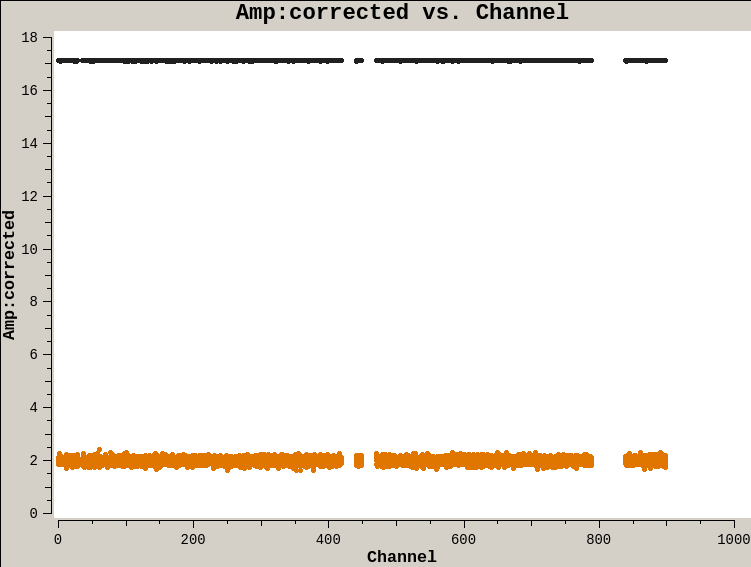

In [25]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='amp',
       correlation='XX,YY',
       ydatacolumn='corrected',
       field=','.join((f_cal,g_cal)),
       coloraxis='field',
       averagedata=True,
       avgtime='3300',
       avgbaseline=True,
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       clearplots=True,
       )
Image('mkat_passband.png', height=500)

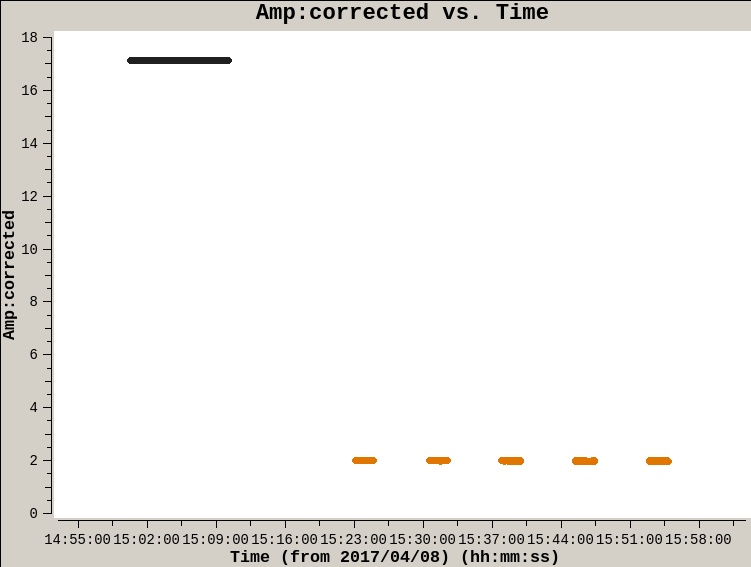

In [26]:
plotms(vis=msfile,
       xaxis='time',
       yaxis='amp',
       correlation='XX,YY',
       ydatacolumn='corrected',
       field=','.join((f_cal,g_cal)),
       coloraxis='field',
       averagedata=True,
       avgbaseline=True,
       avgchannel='4096',
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       clearplots=True,
       )
Image('mkat_passband.png', height=500)

### Inspect target after antenna based calibration

In [28]:
applycal(vis=msfile,
         field=target,
         gaintable=[ftable, btable, ktable],
         gainfield=[g_cal, b_cal, f_cal],
         interp=['', 'nearest', ''],
         calwt=False,
         applymode='calflag')

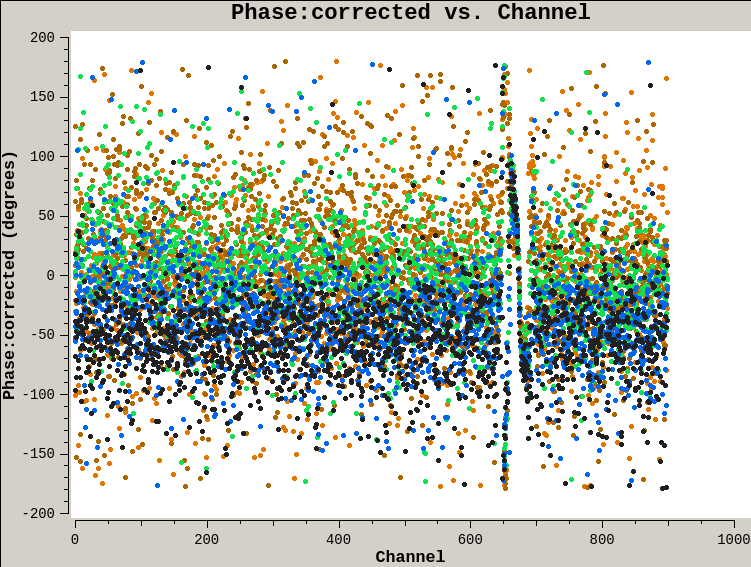

In [29]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='phase',
       ydatacolumn='corrected',
       correlation='XX,YY',
       field=target,
       averagedata=True,
       avgtime='3300',
       avgbaseline=True,
       coloraxis='scan',
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       clearplots=True,
       )
Image('mkat_passband.png', height=500)

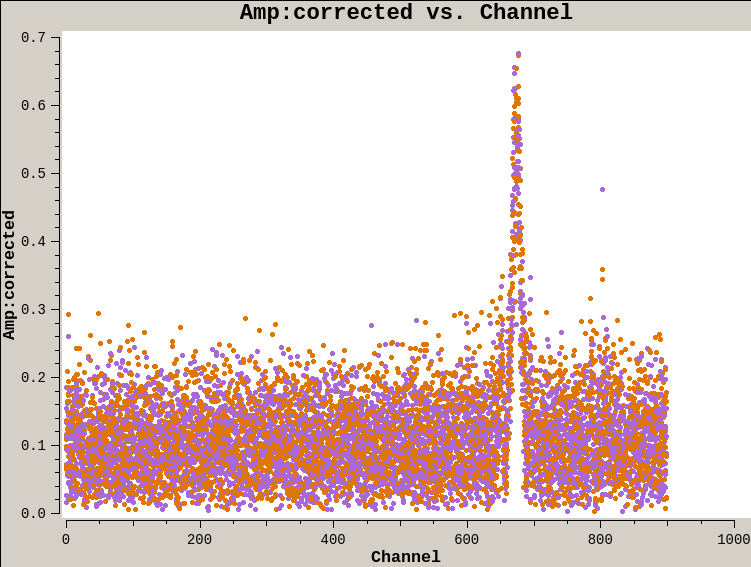

In [30]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='amp',
       ydatacolumn='corrected',
       correlation='XX,YY',
       field=target,
       coloraxis='corr',
       averagedata=True,
       avgtime='3300',
       avgbaseline=True,
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       clearplots=True,
       )
Image('mkat_passband.png', height=500)

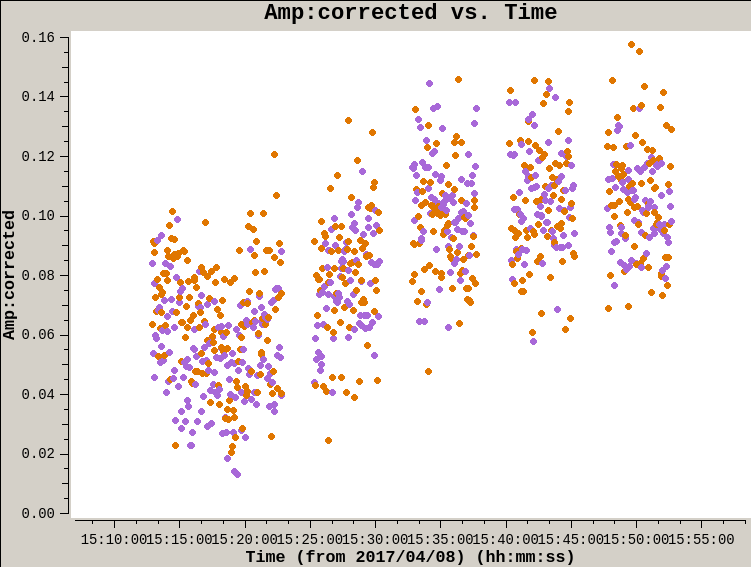

In [31]:
plotms(vis=msfile,
       xaxis='time',
       yaxis='amp',
       ydatacolumn='corrected',
       correlation='XX,YY',
       field=target,
       coloraxis='corr',
       averagedata=True,
       avgbaseline=True,
       avgchannel='4096',
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       clearplots=True,
       )
Image('mkat_passband.png', height=500)

In [34]:
splitted_ms = prefix+'_split.ms'
split(vis=msfile,
      field=target,
      outputvis=splitted_ms,
      datacolumn='corrected')

True

In [35]:
visstat(splitted_ms, axis='amp', field=target)

{'DATA_DESC_ID=0': {'firstquartile': 1.20348060131073,
  'isMasked': True,
  'isWeighted': False,
  'max': 13.495564460754395,
  'maxDatasetIndex': 290,
  'maxIndex': 23207,
  'mean': 2.0246555491808578,
  'medabsdevmed': 0.7301372289657593,
  'median': 1.8793160915374756,
  'min': 0.0004453446890693158,
  'minDatasetIndex': 332,
  'minIndex': 10928,
  'npts': 8100000.0,
  'rms': 2.302347252749416,
  'stddev': 1.0961628199102784,
  'sum': 16399709.948364623,
  'sumOfWeights': 8100000.0,
  'sumsq': 42936503.26516656,
  'thirdquartile': 2.6843225955963135,
  'variance': 1.2015729277536533}}

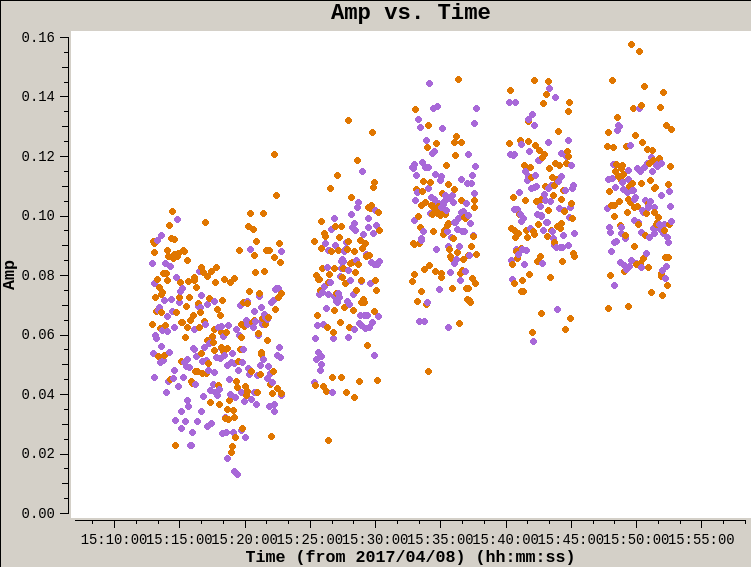

In [36]:
plotms(vis=splitted_ms,
       xaxis='time',
       yaxis='amp',
       correlation='XX,YY',
       coloraxis='corr',
       averagedata=True,
       avgbaseline=True,
       avgchannel='4096',
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       clearplots=True,
       )
Image('mkat_passband.png', height=500)

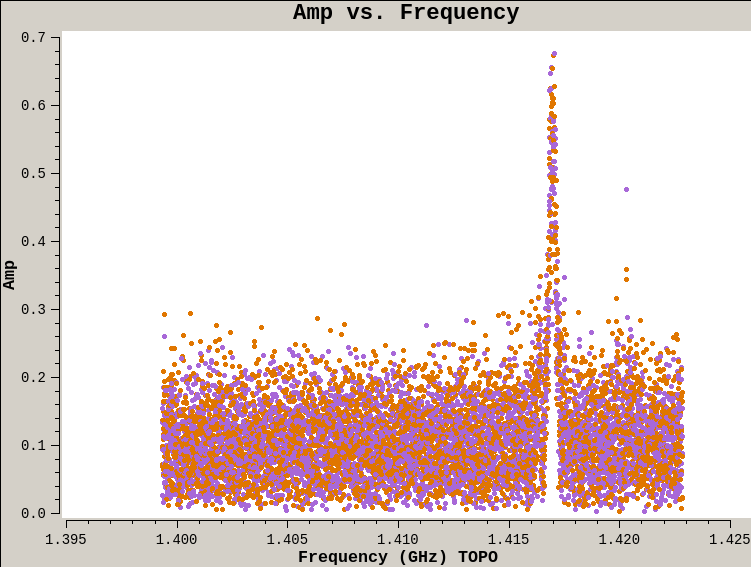

In [37]:
plotms(vis=splitted_ms,
       xaxis='freq',
       yaxis='amp',
       correlation='XX,YY',
       coloraxis='corr',
       averagedata=True,
       avgtime='3300',
       avgbaseline=True,
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       clearplots=True,
       )
Image('mkat_passband.png', height=500)

# Copy flagged data back to Google drive

In [ ]:
!tar -cvzf "ngc3621_splitted.ms.tar.gz" {splitted_ms}

In [ ]:
!tar -tvzf "ngc3621_splitted.ms.tar.gz"

**NOTE: update the path below to the appropriate directory in drive where you want to save the data**

In [40]:
!cp "ngc3621_splitted.ms.tar.gz" "drive/MyDrive/ARIWS public datasets/output"